2. Vizualizace dat

- URL vybrané datové sady: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

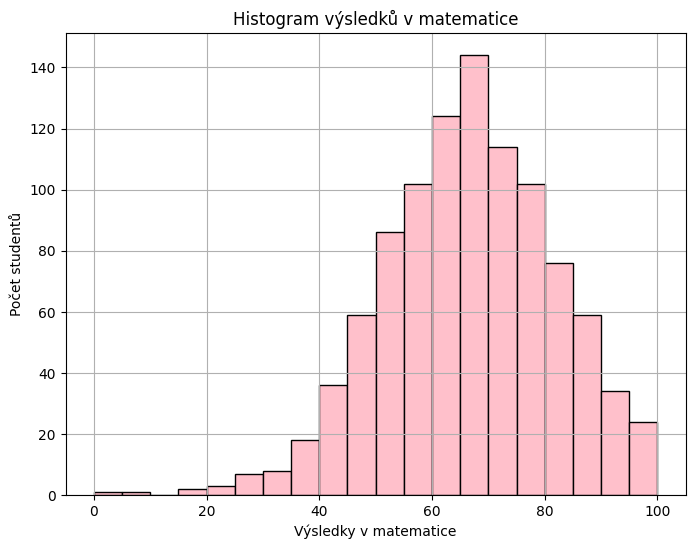

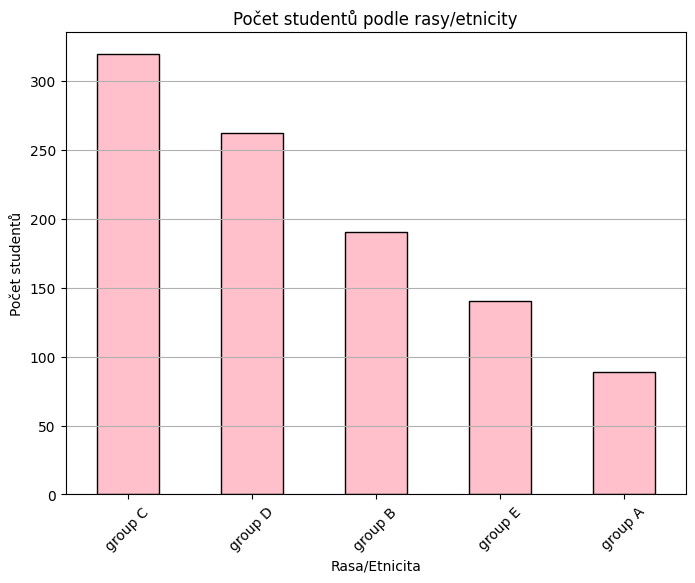

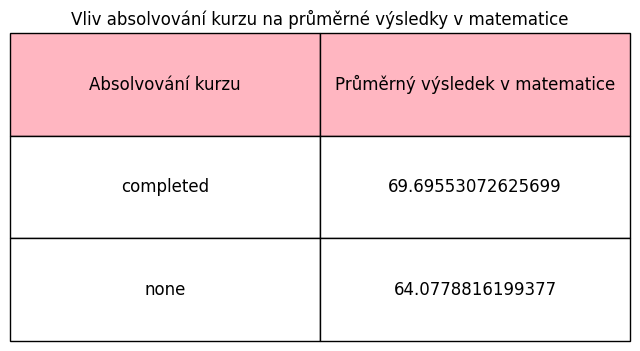

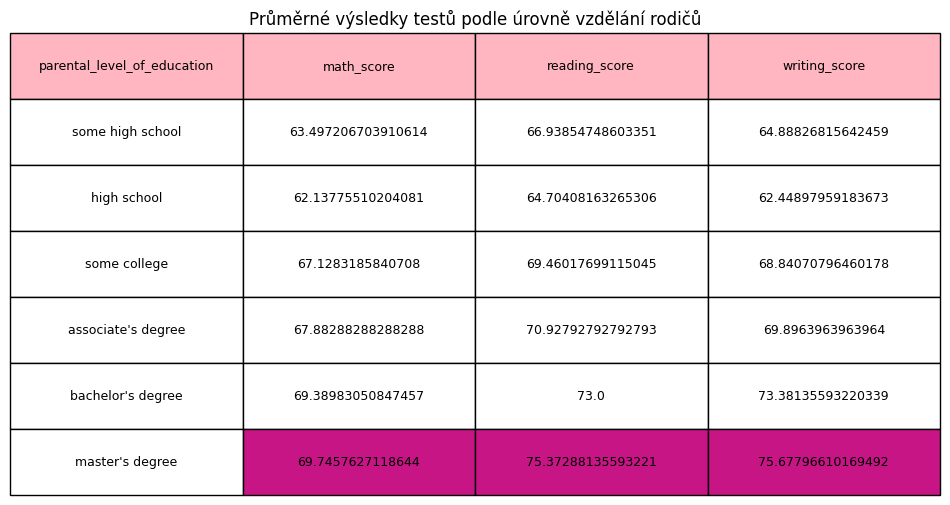

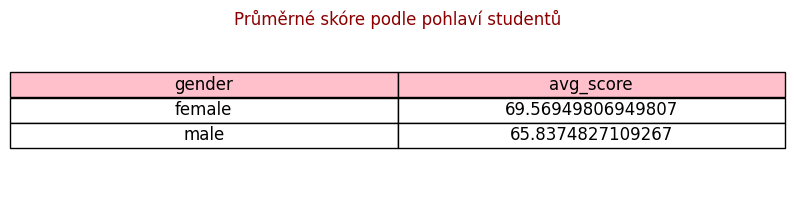

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# načtení dat z csv souboru
df = pd.read_csv("study_performance.csv")

# 1. Histogram výsledků v matematice
plt.figure(figsize=(8, 6))
plt.hist(df["math_score"], bins=20, color="pink", edgecolor="black")
plt.title("Histogram výsledků v matematice")
plt.xlabel("Výsledky v matematice")
plt.ylabel("Počet studentů")
plt.grid(True)
plt.show()

# 2. Histogram počtu studentů podle rasy/etnicity
plt.figure(figsize=(8, 6))
df["race_ethnicity"].value_counts().plot(kind="bar", color="pink", edgecolor="black")
plt.title("Počet studentů podle rasy/etnicity")
plt.xlabel("Rasa/Etnicita")
plt.ylabel("Počet studentů")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 3. Vliv absolvování kurzu(none/completed) na průměrné výsledky v matematice
df_2 = df.groupby("test_preparation_course", observed=False)["math_score"].mean().reset_index()
df_2.columns = ["Absolvování kurzu", "Průměrný výsledek v matematice"]

plt.figure(figsize=(8, 4))
table = plt.table(
    cellText=df_2.values,
    colLabels=df_2.columns,
    cellLoc="center",
    loc="center",
    colColours=["lightpink", "lightpink"],
    bbox=[0, 0, 1, 1],
)
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.axis("off")
plt.title("Vliv absolvování kurzu na průměrné výsledky v matematice", fontsize=12, color="black")
plt.show()

# 4. Průměrné výsledky testů podle úrovně vzdělání rodičů

# vytvoření dataframu pouze s potřebnými informacemi
df_3 = df[["parental_level_of_education", "math_score", "reading_score", "writing_score"]].copy()

# převod na číselný datový typ
df_3["math_score"] = pd.to_numeric(df_3["math_score"], errors="coerce")
df_3["reading_score"] = pd.to_numeric(df_3["reading_score"], errors="coerce")
df_3["writing_score"] = pd.to_numeric(df_3["writing_score"], errors="coerce")

# řazení úrovní vzdělání
poradi = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree",
]
df_3["parental_level_of_education"] = pd.Categorical(df_3["parental_level_of_education"], categories=poradi, ordered=True)
df_3 = df_3.sort_values(by="parental_level_of_education")
df_3 = df_3.groupby("parental_level_of_education", observed=False).mean().reset_index()

# tvorba tabulky
plt.figure(figsize=(12, 6))
table = plt.table(
    cellText=df_3.values,
    colLabels=df_3.columns,
    cellLoc="center",
    loc="center",
    colColours=["lightpink", "lightpink", "lightpink", "lightpink"],
    bbox=[0, 0, 1, 1],
)

# zvýraznění nejvyšších hodnot
for i in range(1, len(df_3.columns)):
    hodnoty = df_3.iloc[:, i]
    max_hodnota = hodnoty.idxmax()
    table.get_celld()[(max_hodnota + 1, i)].set_facecolor("mediumvioletred")

table.set_fontsize(12)
table.scale(1, 1.5)
plt.axis("off")
plt.title("Průměrné výsledky testů podle úrovně vzdělání rodičů", fontsize=12)
plt.show()

# 5. Průměrné výsledky testů podle pohlaví studentů
df[["math_score", "reading_score", "writing_score"]] = df[["math_score", "reading_score", "writing_score"]].round(1)
df["avg_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)
df_4 = df[["gender", "avg_score"]].copy()
df_4 = df_4.groupby("gender").mean().reset_index()

plt.figure(figsize=(10, 2))
table = plt.table(
    cellText=df_4.values,
    colLabels=df_4.columns,
    cellLoc="center",
    loc="center",
    colColours=["pink", "pink"],
)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.axis("off")
plt.title("Průměrné skóre podle pohlaví studentů", fontsize=12, color="darkred")
plt.show()
